## expt_group1.ipynb
### WESmith 05/08/20

In [17]:
import phial.experiment as ws
import phial.toolbox  as tb
import phial.node_functions as nf
from phial.experiment import Experiment
import itertools as it
import numpy as np

In [18]:
nams = ['AND', 'COPY', 'MA',     'MAZ', 'MIN', 
        'MJ',  'MN',   'NAND',   'NOOP','NOR',
        'NOT', 'OR',   'PARITY', 'TRI', 'XOR']

In [19]:
funcs = dict((func, nf.funcLUT.get(func, nf.NOOP_func)) for func in nams)

# ----------------------------------------------------------------------------------------------

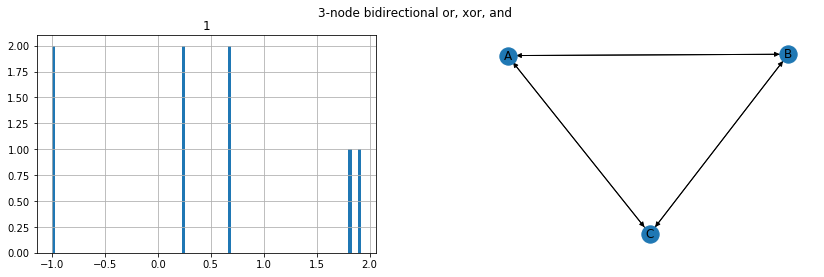

In [20]:
# use funcs from nf: CONTROL case
exp1 = Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    #funcs=dict(A=nf.or_func, B=nf.and_func, C=nf.xor_func),  # old way
    funcs=dict(A=funcs['AND'], B=funcs['OR'], C=funcs['XOR']),
    title='3-node bidirectional or, xor, and')
exp1.run(countUnreachable=True)

In [21]:
exp1.info()

{'timestamp': '2020-05-11 12:00:12.726598',
 'duration': 1.5755299420015945,
 'results': {'010': 1.916665,
  '001': 0.25,
  '110': 0.25,
  '111': 0.666668,
  '000': 0.666668,
  '011': 1.816667,
  '100': -1,
  '101': -1},
 'filename': None}

In [22]:
class AllPerms():
    # create a node set with all possible binary responses
    def __init__(self, N, name=''):
        # N is the maximum number of inputs to the node: the result will handle inputs <= N
        self.N = N
        self.permutations = 2**(N+1)
        self.name = name
        LUT = []
        for k in range(self.permutations):
            nn = [int(i) for i in list('{0:016b}'.format(k))]
            nn.reverse()
            LUT.append([nn[sum(k)] for k in it.product([0,1], repeat=N)])
        self.lut = np.array(LUT).T

    def __call__(self, n):
        # n is the experiment number: a different LUT column is used per experiment
        def node(inputs):
            # inputs is a binary tuple of node inputs, must be <= N used to define the object
            indx = int("".join(str(x) for x in inputs), base=2)
            return self.lut[indx, n]
        return node

In [23]:
# use node_group as source of node functions
N = 2 # number of inputs per node
node_group2 = AllPerms(N)
node_group2.lut

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1]])

In [24]:
# AND is column 4, OR is column 6, XOR is column 2

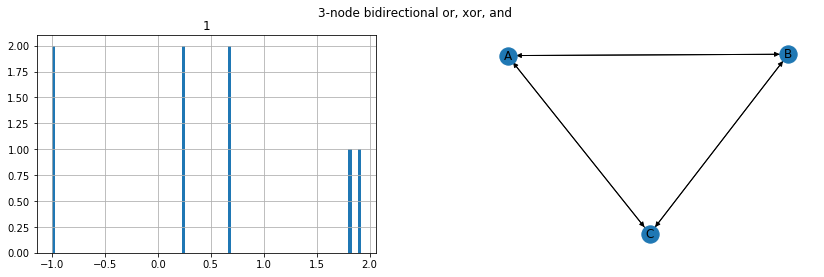

In [25]:
exp2 = Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=node_group2(4), B=node_group2(6), C=node_group2(2)),
    title='3-node bidirectional or, xor, and')
exp2.run(countUnreachable=True)

In [26]:
exp2.info()

{'timestamp': '2020-05-11 12:00:41.675599',
 'duration': 1.5960385300004418,
 'results': {'010': 1.916665,
  '001': 0.25,
  '110': 0.25,
  '111': 0.666668,
  '000': 0.666668,
  '011': 1.816667,
  '100': -1,
  '101': -1},
 'filename': None}

In [27]:
# now use a LARGER node_group as source of node functions
N = 3 # number of inputs per node: greater than 2, the actual inputs per node
node_group3 = AllPerms(N)
node_group3.lut

array([[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

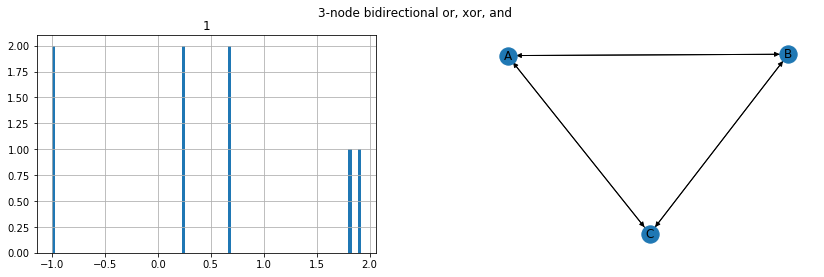

In [28]:
exp3 = Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=node_group3(4), B=node_group3(6), C=node_group3(2)),
    title='3-node bidirectional or, xor, and')  
exp3.run(countUnreachable=True)

In [29]:
exp3.info()

{'timestamp': '2020-05-11 12:01:06.406559',
 'duration': 1.6195896749995882,
 'results': {'010': 1.916665,
  '001': 0.25,
  '110': 0.25,
  '111': 0.666668,
  '000': 0.666668,
  '011': 1.816667,
  '100': -1,
  '101': -1},
 'filename': None}

# DISREGARD OLD STUFF BELOW

# ----------------------------------------------------------------------------------------------

In [16]:
exp2 = Experiment(
         [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C')],
         funcs=dict(A=tb.xor_func, B=tb.xor_func, C=tb.xor_func, D=tb.xor_func),
         title = 'four XOR gates, fully bidirectionally coupled')
exp2.run(countUnreachable=True)

AttributeError: module 'phial.toolbox' has no attribute 'xor_func'

In [ ]:
exp2.info()

# ----------------------------------------------------------------------------------------------

In [ ]:
title = 'four XOR gates, removing one bidirectional link'
edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
title = 'four XOR gates, removing two bidirectional links'
edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'),
          ('D', 'A'), ('D', 'B'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
title = 'four XOR gates, removing one DIRECTIONAL link'
edges =  [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
title = ' two identical 3-node systems, bidirectionally coupled at an XOR node' # this takes 25m on acer laptop
edges =  [('A', 'B'), ('A', 'C'), 
          ('B', 'A'), ('B', 'C'), 
          ('C', 'A'), ('C', 'B'),
          ('D', 'E'), ('D', 'F'), 
          ('E', 'D'), ('E', 'F'), 
          ('F', 'D'), ('F', 'E'),
          ('C', 'F'), ('F', 'C')  # xor's are bidirectionally coupled
         ]
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
funcs = [tb.or_func, tb.and_func, tb.xor_func, tb.or_func, tb.and_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')